# UFCFVQ-15-M Programming for Data Science (Spring 2022)
# Programming Task 2

## Student Id: 21071541

In [2]:
#  import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [3]:
#reading csv in dataframe.
t2a = pd.read_csv('task2a.csv')
t2b = pd.read_csv('task2b.csv')

In [4]:
t2a.columns

Index(['timestamp', 'new_bike_shares'], dtype='object')

In [5]:
t2b.columns

Index(['timestamp', 'temperature', 'feels_like_temp', 'humidity', 'wind_speed',
       'is_weekend', 'season_code'],
      dtype='object')

In [6]:
#comparing timestamps of both dataframe
list(t2a.timestamp) == list(t2b.timestamp)

True

In [7]:
#merge both dataframe based on timestamp column values
t2ab = pd.merge(t2a, t2b, on="timestamp")
print('merge data :  ')
print(t2ab)

merge data :  
              timestamp  new_bike_shares  temperature  feels_like_temp  \
0      04/01/2015 00:00              182          3.0              2.0   
1      04/01/2015 01:00              138          3.0              2.5   
2      04/01/2015 02:00              134          2.5              2.5   
3      04/01/2015 03:00               72          2.0              2.0   
4      04/01/2015 04:00               47          2.0              0.0   
...                 ...              ...          ...              ...   
17409  03/01/2017 19:00             1042          5.0              1.0   
17410  03/01/2017 20:00              541          5.0              1.0   
17411  03/01/2017 21:00              337          5.5              1.5   
17412  03/01/2017 22:00              224          5.5              1.5   
17413  03/01/2017 23:00              139          5.0              1.0   

       humidity  wind_speed  is_weekend  season_code  
0          93.0         6.0           1  

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [8]:
# removing data where new_bike_share is less than 20 and removing season_code column 

t2ab = t2ab[t2ab['new_bike_shares'] >= 20]
t2ab.drop('season_code', inplace=True, axis= 1)
print('table after dropping bike share < 20  : ')
print(t2ab)

table after dropping bike share < 20  : 
              timestamp  new_bike_shares  temperature  feels_like_temp  \
0      04/01/2015 00:00              182          3.0              2.0   
1      04/01/2015 01:00              138          3.0              2.5   
2      04/01/2015 02:00              134          2.5              2.5   
3      04/01/2015 03:00               72          2.0              2.0   
4      04/01/2015 04:00               47          2.0              0.0   
...                 ...              ...          ...              ...   
17409  03/01/2017 19:00             1042          5.0              1.0   
17410  03/01/2017 20:00              541          5.0              1.0   
17411  03/01/2017 21:00              337          5.5              1.5   
17412  03/01/2017 22:00              224          5.5              1.5   
17413  03/01/2017 23:00              139          5.0              1.0   

       humidity  wind_speed  is_weekend  
0          93.0         6.0 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the distribution of bike shares by time of the day

In [9]:

t2ab.columns

Index(['timestamp', 'new_bike_shares', 'temperature', 'feels_like_temp',
       'humidity', 'wind_speed', 'is_weekend'],
      dtype='object')

In [10]:
t2ab.head()

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1


In [11]:
#setting timestamp column to standard date time format.
t2ab.timestamp = pd.to_datetime(t2ab.timestamp)

In [12]:
t2ab.head()

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,1
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1


In [13]:
#creating a new column time_hour which specifies hour of the day(0-23)
t2ab['time_hour'] = t2ab.timestamp.dt.hour

In [14]:
t2ab.head()

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,time_hour
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,1,0
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,1
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,2
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,3
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,4


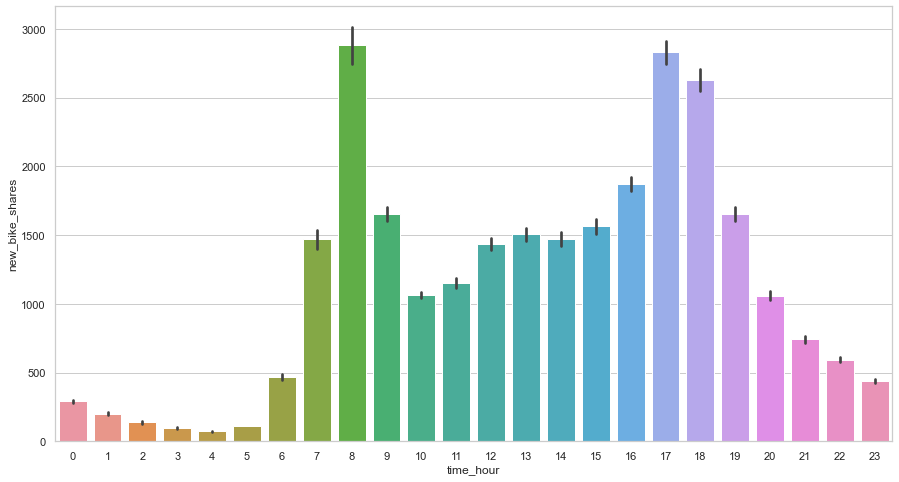

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
ax = sns.barplot(x="time_hour", y="new_bike_shares", data=t2ab)

- Which hour is maximum bike shares on average.
- Dvide it into day time, night time etc and then analysze

           new_bike_shares  temperature  feels_like_temp   humidity  \
time_hour                                                             
8              2882.823204    11.357044        10.271409  77.421271   
17             2829.585165    14.324863        13.521978  63.585852   
18             2629.043956    13.910714        13.096841  65.581044   
16             1869.801370    14.688356        13.876712  61.952740   
9              1653.019257    12.198762        11.177442  73.858322   
19             1651.510316    13.406465        12.543329  68.039890   
15             1564.621399    14.857339        14.078875  61.081619   
13             1505.739011    14.633929        13.870192  62.372940   
14             1472.004121    14.846154        14.073489  61.366071   
7              1468.745179    10.734848         9.605372  80.008953   
12             1433.717421    14.281207        13.490398  64.089163   
11             1151.218707    13.743466        12.897524  66.717331   
10    

Text(0.5, 1.0, 'mean bike_share per hour')

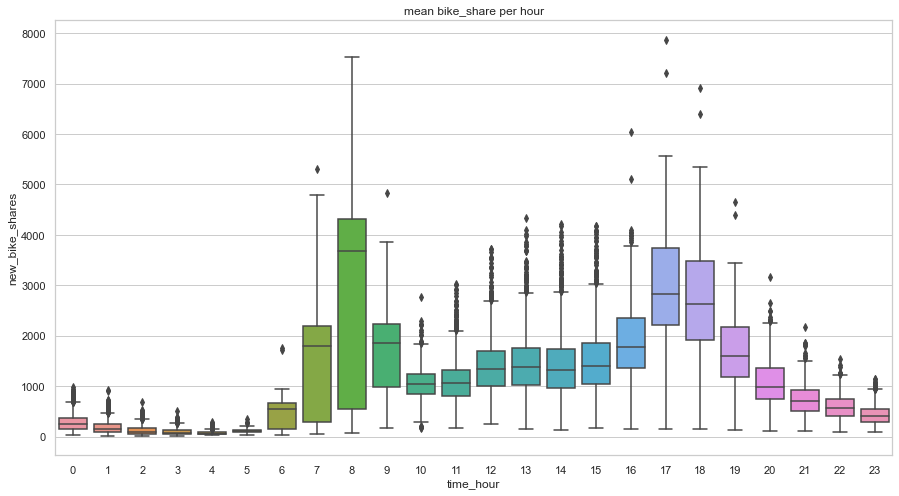

In [16]:
#calculating mean bike_share for each time_hour and plotting it in the box graph to display mean visibly.
a=t2ab.groupby("time_hour")
b=(a.mean('new_bike_shares'))
print(b.sort_values(by=['new_bike_shares'],ascending=False))
plt.figure(figsize = (15,8))
ax = sns.boxplot(x="time_hour", y="new_bike_shares", data=t2ab)
ax.set_title('mean bike_share per hour')


In the table we have sorterd mean bikeshare in descending order where bike_share at 8:00 A.M. is maximum while at 5:00 P.M. is second highest. these are usual office or college hours. 

           new_bike_shares  temperature  feels_like_temp   humidity  \
time_hour                                                             
8              2882.823204    11.357044        10.271409  77.421271   
17             2829.585165    14.324863        13.521978  63.585852   
18             2629.043956    13.910714        13.096841  65.581044   
16             1869.801370    14.688356        13.876712  61.952740   
9              1653.019257    12.198762        11.177442  73.858322   
19             1651.510316    13.406465        12.543329  68.039890   
15             1564.621399    14.857339        14.078875  61.081619   
13             1505.739011    14.633929        13.870192  62.372940   
14             1472.004121    14.846154        14.073489  61.366071   
7              1468.745179    10.734848         9.605372  80.008953   
12             1433.717421    14.281207        13.490398  64.089163   
11             1151.218707    13.743466        12.897524  66.717331   
10    

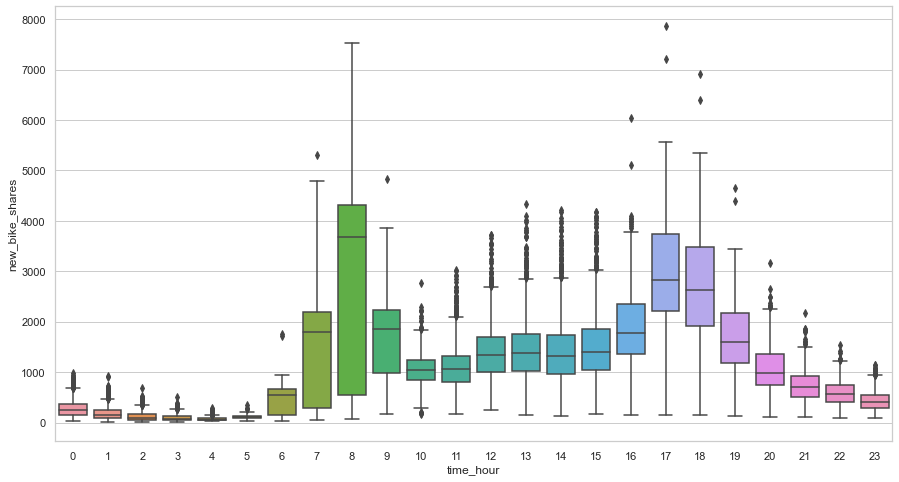

          new_bike_shares  temperature  feels_like_temp   humidity  \
day_time                                                             
False         1483.740690    13.636358        12.789217  67.000974   
True           804.620171    11.313594        10.272130  77.638301   

          wind_speed  is_weekend  time_hour  
day_time                                     
False      17.317234    0.286467  17.492151  
True       14.494284    0.285450   5.519084  


Text(0.5, 1.0, 'day-night bike share distribution')

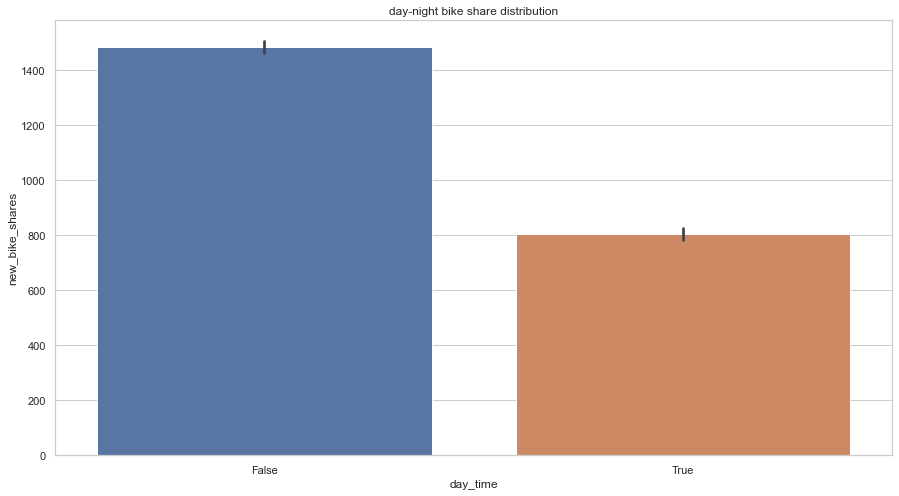

In [17]:
## calculating Daytime and nighttime bikeshare. we have created a new column which holds boolean value true and false (true for day false for night)
t2ab['day_time']=t2ab['time_hour']<12
a=t2ab.groupby("day_time")
b=(a.mean('new_bike_shares'))
print(b.sort_values(by=['new_bike_shares'],ascending=False))
plt.figure(figsize = (15,8))
ax = sns.barplot(x="day_time", y="new_bike_shares", data=t2ab)
ax.set_title("day-night bike share distribution")


from the graph above it is clear that bikeshare is more during night hours (after 12PM) 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Compare the distribution of bike shares by time of the week

Text(0.5, 1.0, 'hourwise weekly bikeshare data')

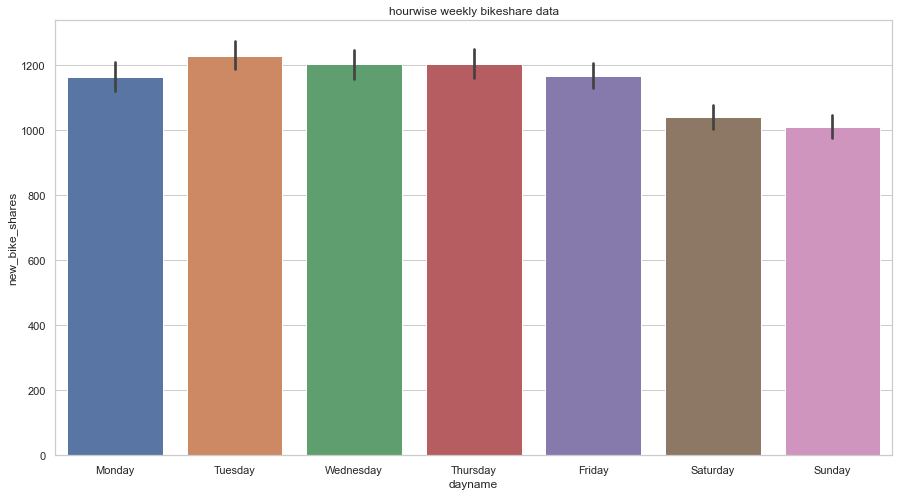

In [26]:

t2ab['dayname']=t2ab['timestamp'].dt.strftime('%A')
t2ab['dayname']=pd.Categorical(t2ab['dayname'],ordered = True , categories =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize = (15,8))
ax = sns.barplot(x="dayname", y="new_bike_shares", data=t2ab)
ax.set_title("hourwise weekly bikeshare data")



from the above graph it is clear that bikeshare is prefered mostly during weekdays, and less during weekend 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of “feels like” temperature on the number of bike shares

In [27]:
t2ab.head()

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,time_hour,day_time,dayname
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,1,0,True,Wednesday
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,1,True,Wednesday
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,2,True,Wednesday
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,3,True,Wednesday
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,4,True,Wednesday


<BarContainer object of 17373 artists>

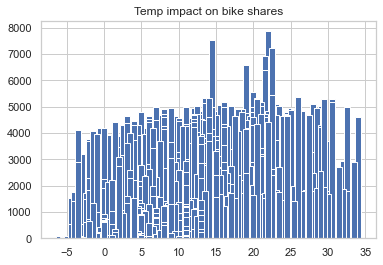

In [28]:
# how does temperature affect number of bike shares?
plt.title("Temprature impact on bike shares")

#bar and line chart normal distribution without grouping
plt.bar(t2ab.feels_like_temp, t2ab.new_bike_shares)

C:\Users\L460\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


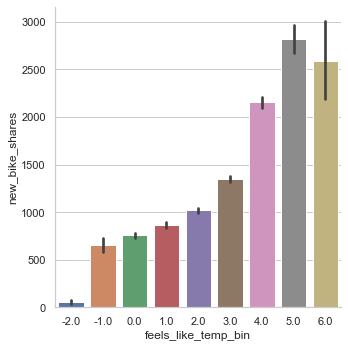

In [29]:
df = t2ab.copy()
df['feels_like_temp_bin'] = np.floor(df['feels_like_temp'])//5
df['feels_like_temp_bin'].unique()
# now we can visualize as follows
sns.factorplot(x="feels_like_temp_bin", y="new_bike_shares", data= df, kind= "bar")

bike share is more when feels like temperature is around 5.0 temp bin

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that “feels like” temperature has an effect on the number of bike shares

In [ ]:
# we are creating temperature slices for better analysis
temp_df = t2ab.groupby(['feels_like_temp'])['new_bike_shares'].sum().reset_index()
print(temp_df)

temp_df['quartile'] = pd.qcut(temp_df['feels_like_temp'], 
                              q=[0, .2, .4, .6, .8, 1], 

precision=0)

print(temp_df)  #make the bins clearer and then regraph this

fig, axs = plt.subplots(figsize=(12, 4))

temp_df.groupby(temp_df["quartile"])["new_bike_shares"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Temperature");  # custom x label using matplotlib
plt.ylabel("Mean number of bike shares");

#chart title
plt.title('Temperature')

when temprature is aroung 10-18 bike share is maximum

We can do a correlation test using Spearman's Rank Correlation test to assess if "feels like" temperature and number of bike shares is correlated. Spearman's Correlation is a non-parametric rank correlation. In this instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated by converting the raw data into rank data hence non-parametric. This is a common approach used in non-parametric statistics.

𝐻o : "new_bike_shares" and "feels_like_temp" are not correlated.        
alpha : 0.05

In [29]:
import scipy.stats as stats
corr, p = stats.spearmanr(t2ab.new_bike_shares, t2ab["feels_like_temp"])

ALPHA = 0.05

print(f'\n* new_bike_shares & feels_like_temp \n')
print(f'corr: {round(corr, 4)} \t p: {p}')

if p <= ALPHA:
    print(f'Rejected H0 under significance level {ALPHA}, new_bike_shares & feels_like_temp are correlated')
else:
    print(f'''Fail to reject H0 due to lack of evidence under significance level {ALPHA}, 
          new_bike_shares & feels_like_temp are not correlated''')


* new_bike_shares & feels_like_temp 

corr: 0.3849 	 p: 0.0
Rejected H0 under significance level 0.05, new_bike_shares & feels_like_temp are correlated


According to the spearsman correlation test new_bike_share and Feels_like_temp are correlated. (positively)

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Programming Task 2


Process Development for task2
Task 2 mainly consisted of plotting graphs and creating a visual representation of data. we were suppose to various analysis and genereate relevant graphs to display our data pictorically. intially we were provided with 2 csv which we merged based on timestamp values. the resultant csv now holds the data of bike_share for each hour and also holds data related to climatic conditions. through various graphs we concluded that
- bike share is more on weekdays and less in weekends(sat,sunday)
- bike share is more in start end end of working hoours(8:00 AM and 5:00PM) while less throughout the day
- bikeshare is prefered mostly in evening sessions than to morning
- with increase in temprature(feels_like temprature) bike share increases

different types of graph can be used for better representation, pie chart would have been better for week day distribution of data. Infact we can carry more analysis like monthwise bikeshare or season wise.. 


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>